# Uber-rides-data-analysis

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="uber-rides-data-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "iguedeominiabohs/uber-rides-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/iguedeominiabohs/uber-rides-data-analysis


'https://jovian.ai/iguedeominiabohs/uber-rides-data-analysis'

# INTRODUCTION

 This project carries out an exploratory data analysis on 1,115 Uber rides in 2016. The dataset can be found [here]('https://www.kaggle.com/suiyue/uber-rides-dataset-2016-analysis/data?select=My+Uber+Drives+-+2016.csv'). It contains information about start date, end date, start location, end location, Miles Driven and Purpose of drive (Business, Personal, Meals, Errands, Meetings, Customer Support etc.) Questions I wish to answer with the dataset include:

- What was the total miles travelled in 2016?
- What month had the highest number of trips?
- What is the most popular category?
- What was the most visited location?


## IMPORT LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## LOAD DATASET

In [5]:
df = pd.read_csv('Uber Drives - .csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [8]:
#Renaming columns to simplify them and remove asterisk(*) from column names
df.columns = ['Start_date','End_date','Category','Start_location','Stop_location','Miles','Purpose']
df.head()

,Start_date,End_date,Category,Start_location,Stop_location,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
#checking for missing values
df.isnull().sum()

Start_date          0
End_date            1
Category            1
Start_location      1
Stop_location       1
Miles               0
Purpose           503
dtype: int64

In [10]:
#Filling missing values in Purpose column with 'Unknown'
df['Purpose'] = df['Purpose'].fillna("Unknown")
df.head()

,Start_date,End_date,Category,Start_location,Stop_location,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
#dropping missing values in other columns and theen verifying they have been dropped
df = df.dropna()
df.isnull().sum()

Start_date        0
End_date          0
Category          0
Start_location    0
Stop_location     0
Miles             0
Purpose           0
dtype: int64

In [12]:
df.dtypes

Start_date         object
End_date           object
Category           object
Start_location     object
Stop_location      object
Miles             float64
Purpose            object
dtype: object

In [13]:
#converting date objects (start_date & end_date) to datetime objects
df['Start_date'] = pd.to_datetime(df['Start_date'], format = "%m/%d/%Y %H:%M")
df['End_date'] = pd.to_datetime(df['End_date'], format = "%m/%d/%Y %H:%M")

df.head()

,Start_date,End_date,Category,Start_location,Stop_location,Miles,Purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [14]:
df.dtypes

Start_date        datetime64[ns]
End_date          datetime64[ns]
Category                  object
Start_location            object
Stop_location             object
Miles                    float64
Purpose                   object
dtype: object

In [15]:
#creating hour, month and day of the week columns
df['Hour'] = df['Start_date'].apply(lambda time: time.hour)
df['Month'] = df['Start_date'].apply(lambda time: time.month)
df['Day_of_the_week'] = df['Start_date'].apply(lambda time: time.dayofweek)

In [16]:
 dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['Weekday'] = df['Day_of_the_week'].map(dmap)

In [18]:
mmap = {1:'Jan', 2:'Feb',3:'Mar', 4:'Apr',5:'May',6:'June',7:'July', 8:'Aug', 9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['Month'] = df['Month'].map(mmap)
df['Month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
1150    Dec
1151    Dec
1152    Dec
1153    Dec
1154    Dec
Name: Month, Length: 1155, dtype: object

In [19]:
#Calculating duration of each ride
df['Duration'] = df['End_date'] - df['Start_date']
df.dtypes

Start_date          datetime64[ns]
End_date            datetime64[ns]
Category                    object
Start_location              object
Stop_location               object
Miles                      float64
Purpose                     object
Hour                         int64
Month                       object
Day_of_the_week              int64
Weekday                     object
Duration           timedelta64[ns]
dtype: object

In [20]:
#removing days from duration
df['Duration'] = df['Duration'].astype(str).map(lambda x: x[7:])
df['Duration']

0       00:06:00
1       00:12:00
2       00:13:00
3       00:14:00
4       01:07:00
          ...   
1150    00:07:00
1151    00:18:00
1152    00:35:00
1153    00:18:00
1154    01:43:00
Name: Duration, Length: 1155, dtype: object

In [21]:
df.head()

,Start_date,End_date,Category,Start_location,Stop_location,Miles,Purpose,Hour,Month,Day_of_the_week,Weekday,Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Jan,4,Fri,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Jan,5,Sat,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Jan,5,Sat,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Jan,1,Tue,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Jan,2,Wed,01:07:00


## VISUALIZATIONS

In [22]:
#Maximum and minimum miles travelled
print('Maximum miles travelled is:', df['Miles'].max())
print('Minimum miles travelled is:', df['Miles'].min())

Maximum miles travelled is: 310.3
Minimum miles travelled is: 0.5


In [23]:
#Maximum and minimum duration spent on a ride
print('Maximum duration for a trip is:', df['Duration'].max())
print('Minimum duration for a trip is:', df['Duration'].min())

Maximum duration for a trip is: 05:36:00
Minimum duration for a trip is: 00:00:00


In [24]:
df[df['Miles']==310.3]

,Start_date,End_date,Category,Start_location,Stop_location,Miles,Purpose,Hour,Month,Day_of_the_week,Weekday,Duration
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,16,Mar,4,Fri,05:30:00


In [25]:
df[df['Miles']==0.5]

,Start_date,End_date,Category,Start_location,Stop_location,Miles,Purpose,Hour,Month,Day_of_the_week,Weekday,Duration
44,2016-01-26 17:27:00,2016-01-26 17:29:00,Business,Cary,Cary,0.5,Errand/Supplies,17,Jan,1,Tue,00:02:00
120,2016-02-17 16:38:00,2016-02-17 16:43:00,Business,Katunayaka,Katunayaka,0.5,Errand/Supplies,16,Feb,2,Wed,00:05:00
420,2016-06-08 17:16:00,2016-06-08 17:18:00,Business,Soho,Tribeca,0.5,Errand/Supplies,17,June,2,Wed,00:02:00


In [26]:
#The dataset has some trips were duration is 0s. Checking the dataframe for these occurences...
df[df['Duration']=='00:00:00']

,Start_date,End_date,Category,Start_location,Stop_location,Miles,Purpose,Hour,Month,Day_of_the_week,Weekday,Duration
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,Unknown,17,Sep,1,Tue,00:00:00
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,Unknown,7,Sep,4,Fri,00:00:00
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,Unknown,15,Oct,5,Sat,00:00:00
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,Unknown,13,Oct,3,Thu,00:00:00


In [27]:
#checking the information for the 5 hours plus trip
df[df['Duration']=='05:36:00']

,Start_date,End_date,Category,Start_location,Stop_location,Miles,Purpose,Hour,Month,Day_of_the_week,Weekday,Duration
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,Unknown,21,Sep,1,Tue,05:36:00


In [28]:
df.Month.value_counts()

Dec     146
Aug     133
Nov     122
Feb     115
Mar     113
July    112
June    108
Oct     106
Jan      61
Apr      54
May      49
Sep      36
Name: Month, dtype: int64

Text(0.5, 1.0, 'Number of rides per month')

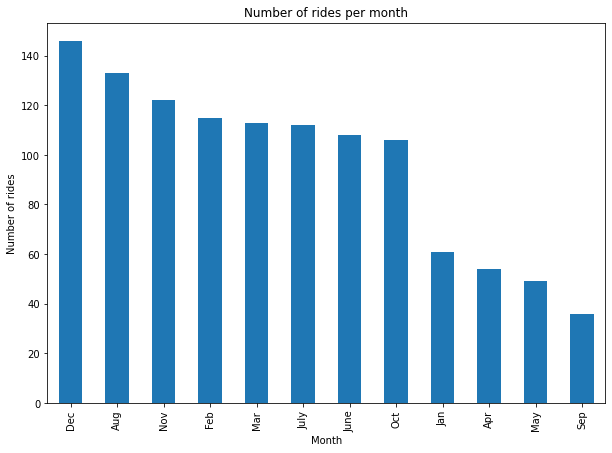

In [29]:
df.Month.value_counts().plot(kind='bar', figsize=(10,7))
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.title('Number of rides per month')

In [30]:
df.Purpose.value_counts()

Unknown            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: Purpose, dtype: int64

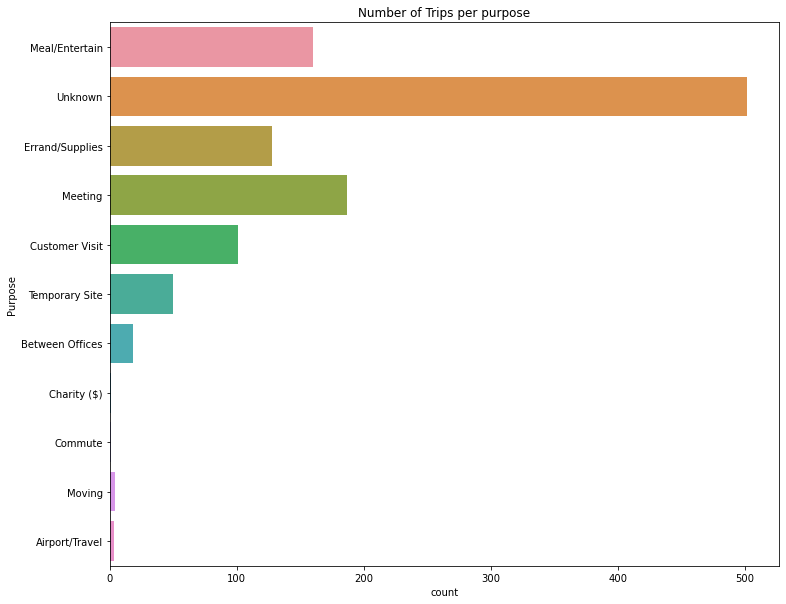

In [31]:
plt.figure(figsize=(12,10))
plt.xlabel('Number of Rides')
plt.ylabel('Purpose of ride')
plt.title('Number of Trips per purpose')
sns.countplot(y='Purpose',data=df)
plt.show()

<AxesSubplot:title={'center':'Number of Trips per Category per weekday'}, xlabel='Weekday', ylabel='count'>

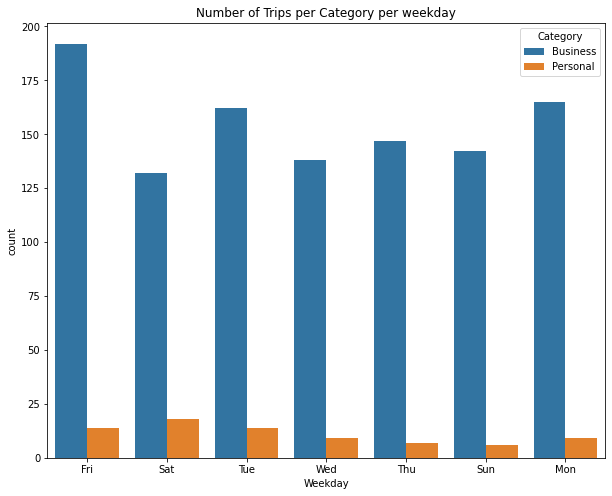

In [32]:
plt.figure(figsize=(10,8))
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Number of Trips per Category per weekday')
sns.countplot(x='Weekday',data=df,hue='Category')

[Text(0, 0, 'Meal/Entertain'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'Errand/Supplies'),
 Text(3, 0, 'Meeting'),
 Text(4, 0, 'Customer Visit'),
 Text(5, 0, 'Temporary Site'),
 Text(6, 0, 'Between Offices'),
 Text(7, 0, 'Charity ($)'),
 Text(8, 0, 'Commute'),
 Text(9, 0, 'Moving'),
 Text(10, 0, 'Airport/Travel')]

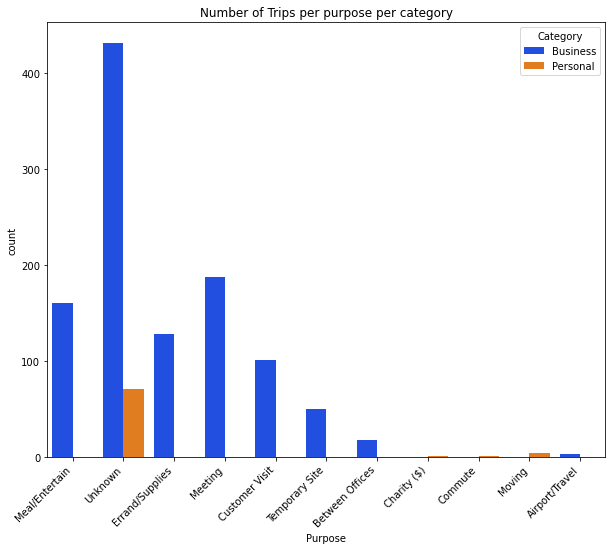

In [33]:
plt.figure(figsize=(10,8))
plt.xlabel('Purpose of trip')
plt.ylabel('Number of Rides')
plt.title('Number of Trips per purpose per category')
chart = sns.countplot(x='Purpose',data=df,hue='Category', palette='bright')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')


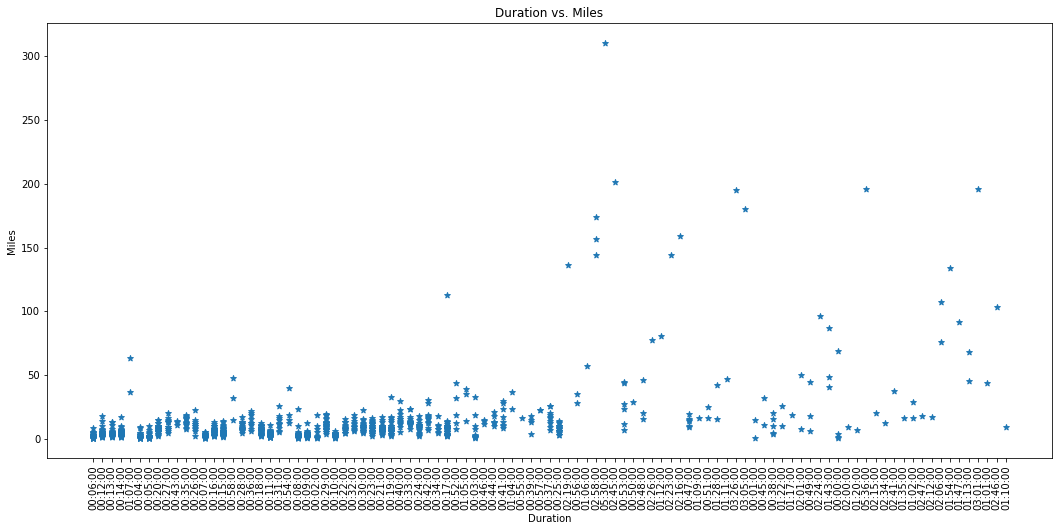

In [34]:
#exploring relationship between miles and duration
plt.figure(figsize=(18,8))
plt.xlabel('Duration')
plt.ylabel('Miles')
plt.title('Duration vs. Miles')
plt.xticks(rotation=90)
plt.scatter(x='Duration',y='Miles', data=df,marker='*')


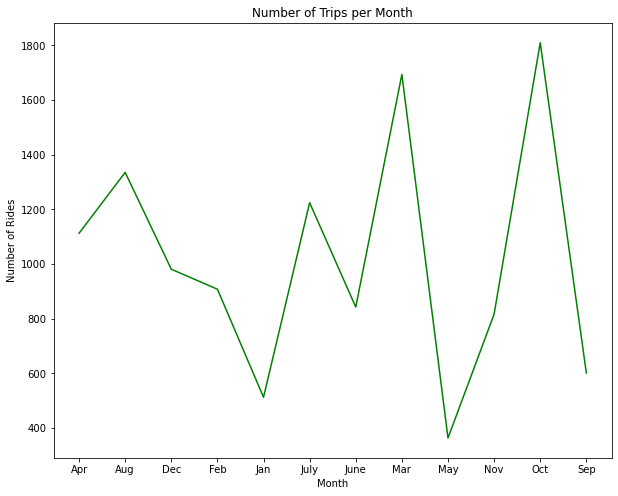

In [35]:
#Line plot of trips per month
plt.figure(figsize=(10,8))
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Number of Trips per Month')
plt.plot(df.groupby(['Month'])['Miles'].sum(),'g')

In [36]:
df.Start_location.value_counts().sort_values(ascending=False)

Cary                  201
Unknown Location      148
Morrisville            85
Whitebridge            68
Islamabad              57
                     ... 
Hayesville              1
Connecticut Avenue      1
Arlington               1
Krendle Woods           1
Gampaha                 1
Name: Start_location, Length: 177, dtype: int64

Text(0, 0.5, 'Number of rides')

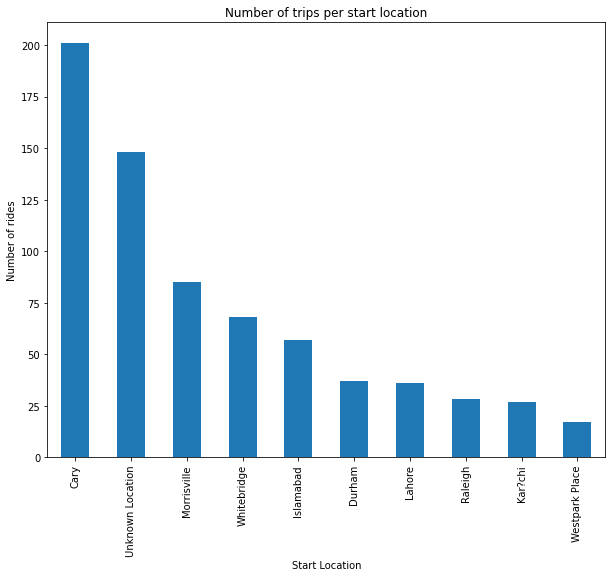

In [37]:
df.Start_location.value_counts().nlargest(10).plot(kind='bar', figsize=(10,8))
plt.title('Number of trips per start location')
plt.xlabel('Start Location')
plt.ylabel('Number of rides')

Text(0, 0.5, 'Number of rides')

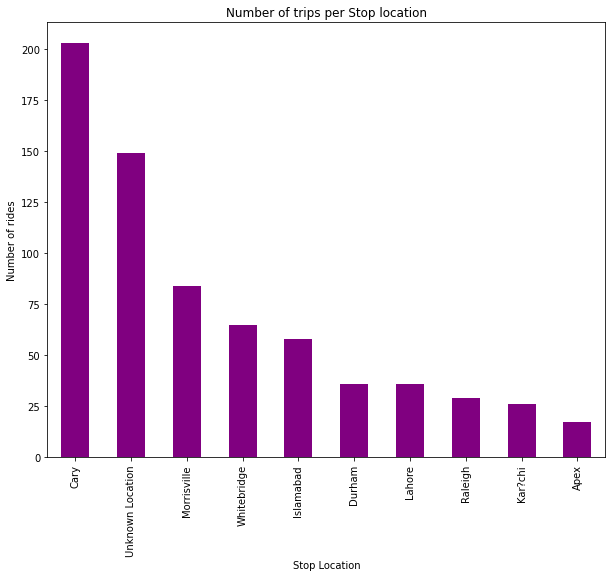

In [38]:
df.Stop_location.value_counts().nlargest(10).plot(kind='bar', figsize=(10,8),color=['purple'])
plt.title('Number of trips per Stop location')
plt.xlabel('Stop Location')
plt.ylabel('Number of rides')

In [39]:
df[df['Stop_location']=='Cary']

,Start_date,End_date,Category,Start_location,Stop_location,Miles,Purpose,Hour,Month,Day_of_the_week,Weekday,Duration
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,13,Jan,3,Thu,00:06:00
27,2016-01-15 00:41:00,2016-01-15 01:01:00,Business,Morrisville,Cary,8.0,Errand/Supplies,0,Jan,4,Fri,00:20:00
29,2016-01-15 13:26:00,2016-01-15 13:44:00,Business,Durham,Cary,10.4,Meal/Entertain,13,Jan,4,Fri,00:18:00
30,2016-01-18 14:55:00,2016-01-18 15:06:00,Business,Cary,Cary,4.8,Meal/Entertain,14,Jan,0,Mon,00:11:00
36,2016-01-20 13:25:00,2016-01-20 14:19:00,Business,Raleigh,Cary,40.2,Customer Visit,13,Jan,2,Wed,00:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1048,2016-12-13 18:19:00,2016-12-13 18:29:00,Business,Cary,Cary,4.2,Errand/Supplies,18,Dec,1,Tue,00:10:00
1049,2016-12-13 20:20:00,2016-12-13 20:29:00,Business,Cary,Cary,4.1,Meal/Entertain,20,Dec,1,Tue,00:09:00
1050,2016-12-14 16:52:00,2016-12-14 17:10:00,Business,Cary,Cary,3.4,Unknown,16,Dec,2,Wed,00:18:00
1051,2016-12-14 17:22:00,2016-12-14 17:34:00,Business,Cary,Cary,3.3,Unknown,17,Dec,2,Wed,00:12:00


## INSIGHTS/FINDINGS

<p class="lead"> From the exploratory data analysis carried out on the dataset, we can tell that:
    
<p class="lead"> 1. The minimum duration of a trip was 0s. This could be either because the driver or the passenger cancelled the ride before it began. The maximum duration of a trip was 5 hours 36 minutes, however, the start and stop locations are unknown.

<p class="lead"> 2. The maximum number of miles travelled was 310.3 miles from Latta to Jacksonville, however it has a shorter duration that the previously unknown trips. The minimum miles travelled was 0.5 miles, mainly to run errands/get supplies.

<p class="lead"> 3. December was the busiest month with 146 rides and September was the least busy month with 36 trips. 

<p class="lead"> 4. Most of the trips made were for Business purposes. 

<p class="lead"> 5. Other than rides for unknown purposes, the top three purposes for a ride were Meetings - 187, Meals/Entertainment - 160 and Errands/Supplies -  128.

<p class="lead"> 6. Fridays were the busiest days of the week for the rider. 

<p class="lead"> 7. The top five known Start and Stop locations are: Cary, Morrisville, Whitebridge, Islamabad and Durham. The first 3 are located in North Carolina, USA and we can deduce that the rider either lives in North Carolina or does a lot of businesses in the city. The fourth location is in Pakistan and the fifth location - Durham is located in England. Unknown locations make up the second largest in the count which could either be from privacy or error in data entry. </p>
